<a href="https://colab.research.google.com/github/ravichas/PredAnal4Business_Udacity/blob/main/PredictingCatalogDemand_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Catalog Demand

This project is part of Predictive Analytics for Business Nanodegree. 
Details of the project are explained in the pdf document,   `PredictingCatalogDemandSummary.pdf`


In [2]:
install.packages("ggthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("fastDummies")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(readxl)
library(fastDummies)
library(ggthemes)

In [6]:
p1_customers <- read_excel("PredCatalogDemand/p1-customers.xlsx")
#View(p1_customers)  
p1_mailinglist <- read_excel("PredCatalogDemand/p1-mailinglist.xlsx")

In [7]:
colnames(p1_customers)
colnames(p1_mailinglist)


[1] "Name"                       "Customer_Segment"          
 [3] "Customer_ID"                "Address"                   
 [5] "City"                       "State"                     
 [7] "ZIP"                        "Avg_Sale_Amount"           
 [9] "Store_Number"               "Responded_to_Last_Catalog" 
[11] "Avg_Num_Products_Purchased" "#_Years_as_Customer"

[1] "Name"                       "Customer_Segment"          
 [3] "Customer_ID"                "Address"                   
 [5] "City"                       "State"                     
 [7] "ZIP"                        "Store_Number"              
 [9] "Avg_Num_Products_Purchased" "#_Years_as_Customer"       
[11] "Score_No"                   "Score_Yes"

In [8]:

#clean the colnames 
library(tidyverse)
p1_customers <- p1_customers %>% 
  rename(Num_Years_as_Customer = "#_Years_as_Customer")

p1_mailinglist <- p1_mailinglist %>% 
  rename(Num_Years_as_Customer = "#_Years_as_Customer")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [9]:
library(fastDummies)
p1_customers <- dummy_cols(p1_customers, select_columns = "Customer_Segment", remove_first_dummy = TRUE,
                 remove_selected_columns = TRUE)

p1_mailinglist <- dummy_cols(p1_mailinglist, select_columns = "Customer_Segment", remove_first_dummy = TRUE,
                            remove_selected_columns = TRUE)

# EDA

`geom_smooth()` using formula = 'y ~ x'


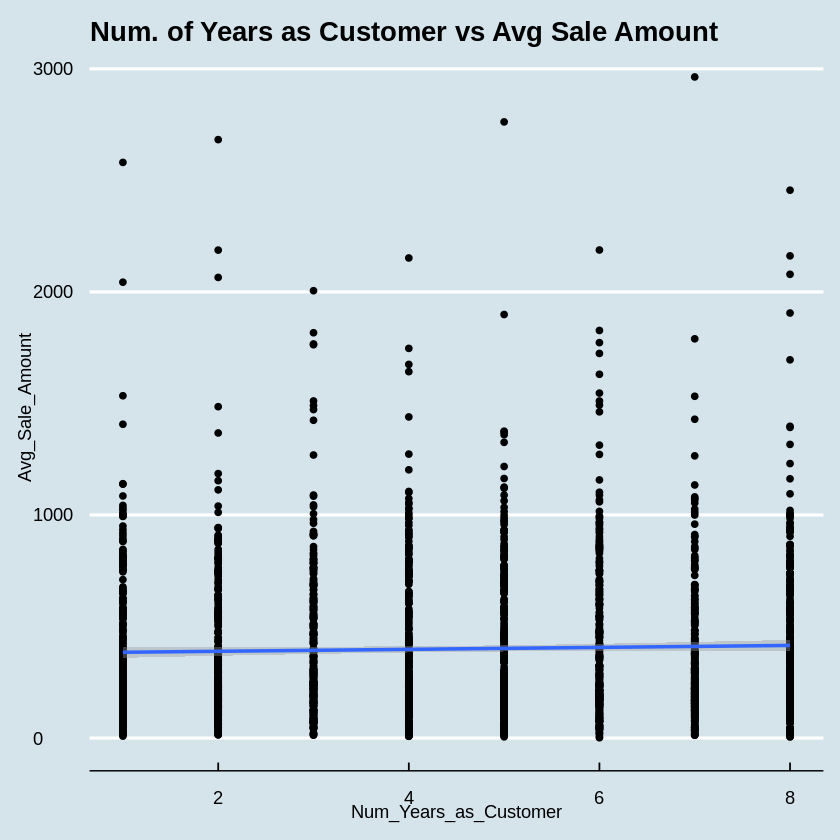

In [15]:
b <- ggplot(p1_customers, aes(Num_Years_as_Customer, Avg_Sale_Amount)) 
b + geom_point() + 
  geom_smooth(method="lm") +
  ggthemes::theme_economist() +
  ggtitle("Num. of Years as Customer vs Avg Sale Amount");

`geom_smooth()` using formula = 'y ~ x'


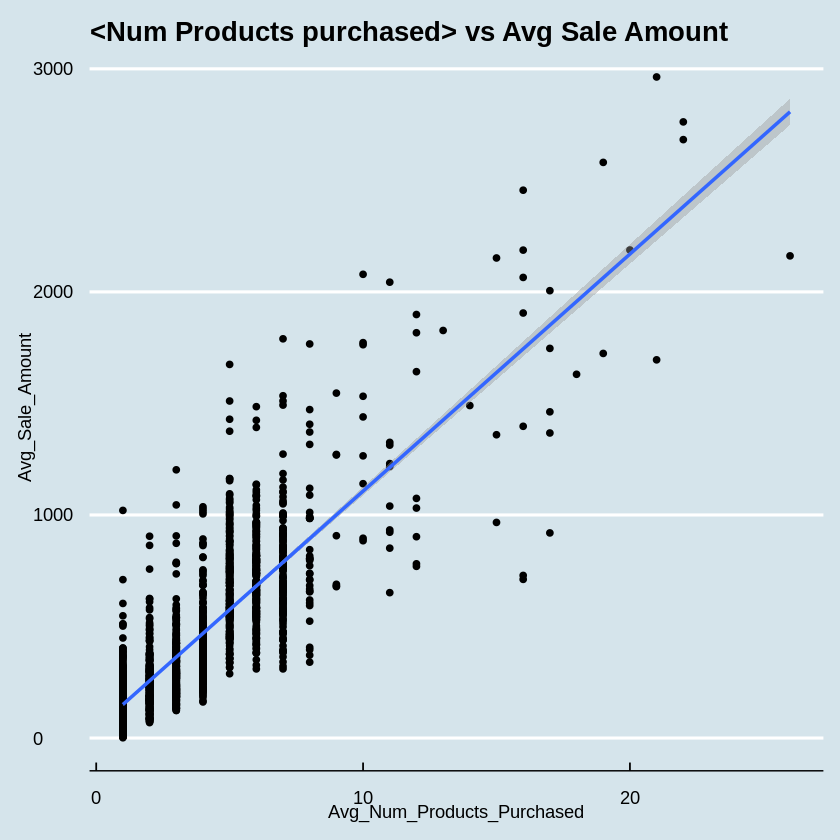

In [16]:
b <- ggplot(p1_customers, aes(Avg_Num_Products_Purchased, Avg_Sale_Amount)) 
b + geom_point() + 
  geom_smooth(method="lm") +
  ggthemes::theme_economist() +
  ggtitle("<Num Products purchased> vs Avg Sale Amount")

`geom_smooth()` using formula = 'y ~ x'


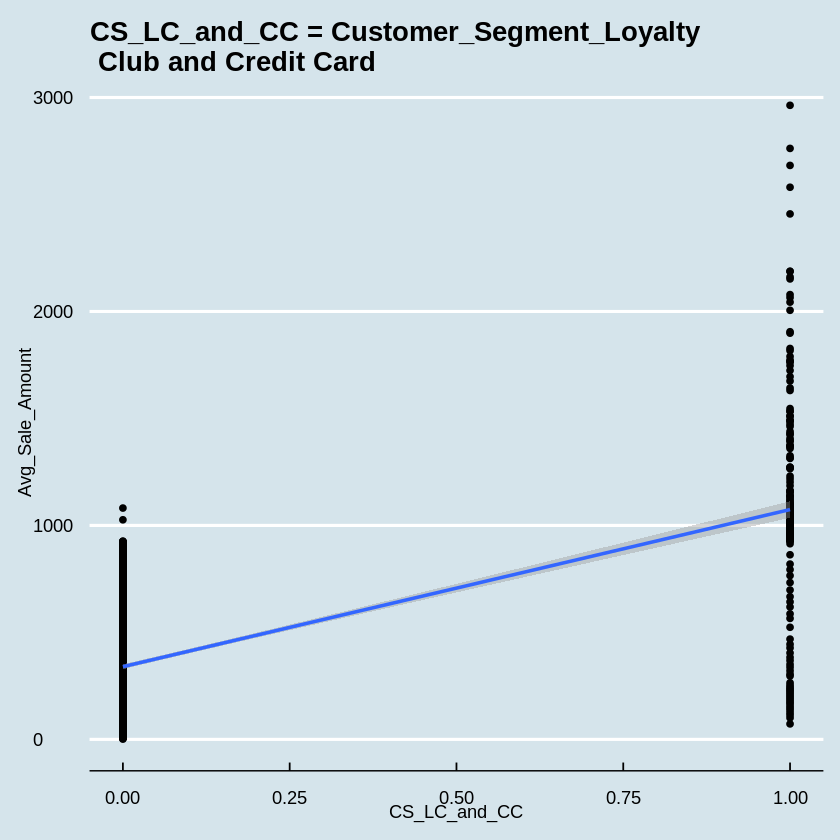

In [17]:
ggplot(p1_customers, aes(CS_LC_and_CC, Avg_Sale_Amount)) +
  geom_point() + 
  geom_smooth(method="lm") +
  ggthemes::theme_economist() +
  ggtitle("CS_LC_and_CC = Customer_Segment_Loyalty\n Club and Credit Card");

`geom_smooth()` using formula = 'y ~ x'


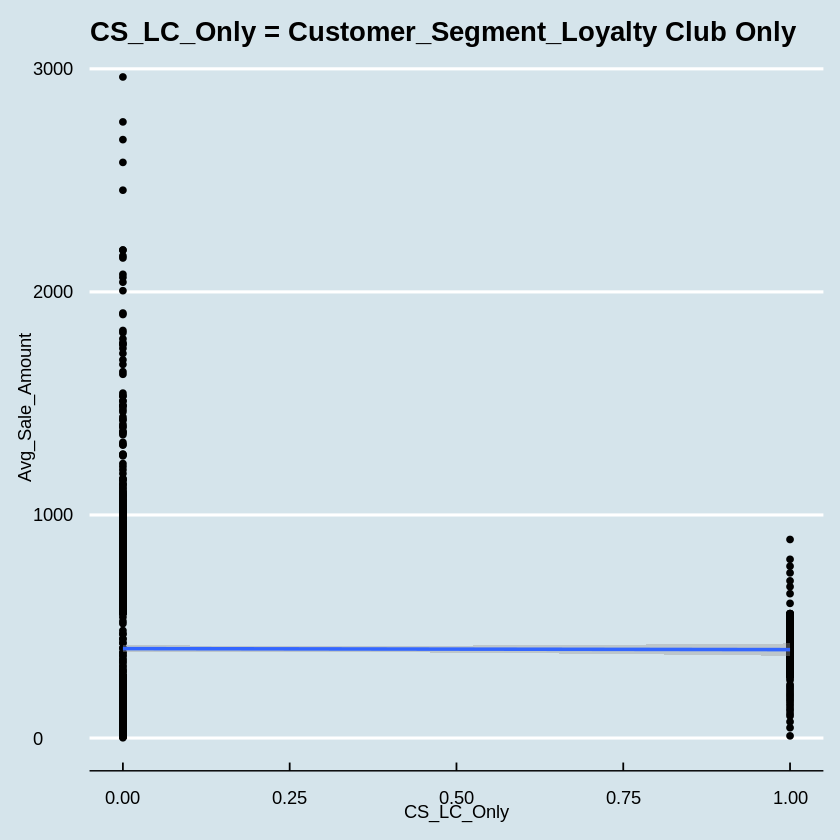

In [18]:
ggplot(p1_customers, aes(CS_LC_Only, Avg_Sale_Amount)) +
  geom_point() + 
  geom_smooth(method="lm") +
  ggthemes::theme_economist() +
  ggtitle("CS_LC_Only = Customer_Segment_Loyalty Club Only");

`geom_smooth()` using formula = 'y ~ x'


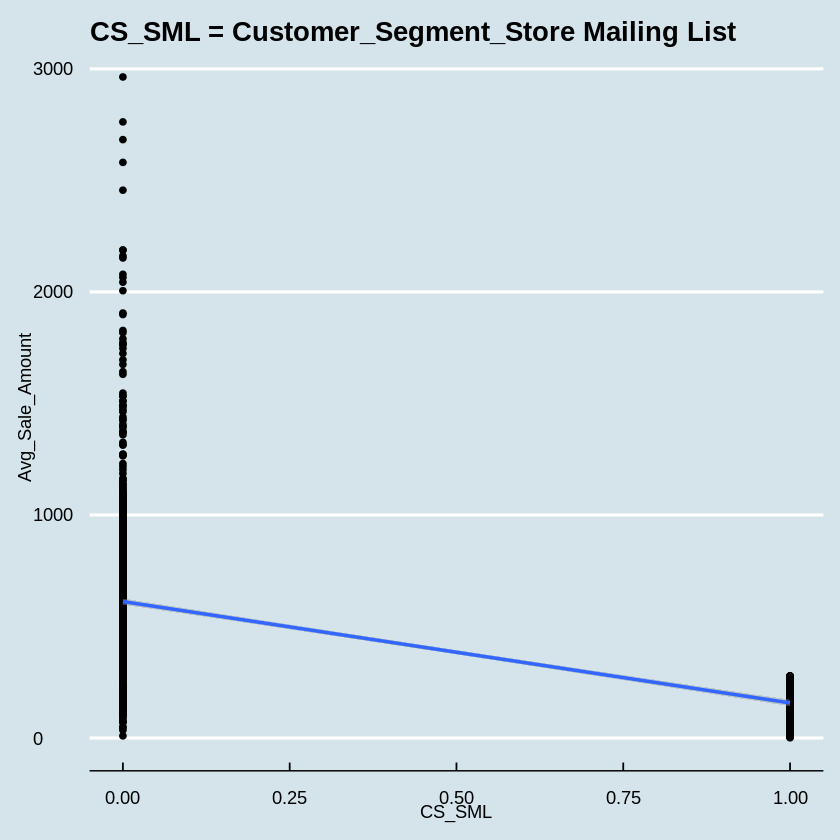

In [19]:
ggplot(p1_customers, aes(CS_SML, Avg_Sale_Amount)) +
  geom_point() + 
  geom_smooth(method="lm") +
  ggthemes::theme_economist() +
  ggtitle("CS_SML = Customer_Segment_Store Mailing List")

In [11]:
# note the base level is set to credit card only class
p1_customers <- p1_customers %>% 
  rename(CS_LC_and_CC = "Customer_Segment_Loyalty Club and Credit Card",
         CS_LC_Only = "Customer_Segment_Loyalty Club Only",
         CS_SML = "Customer_Segment_Store Mailing List")


p1_mailinglist <- p1_mailinglist %>% 
  rename(CS_LC_and_CC = "Customer_Segment_Loyalty Club and Credit Card",
         CS_LC_Only = "Customer_Segment_Loyalty Club Only",
         CS_SML = "Customer_Segment_Store Mailing List")

Note, here I use only selected features for modeling. This decision was based on statistical significance. 

In [12]:
model <- lm(data = p1_customers, Avg_Sale_Amount ~ Avg_Num_Products_Purchased + 
              CS_LC_and_CC + 
              CS_LC_Only + 
              CS_SML)
summary(model)


Call:
lm(formula = Avg_Sale_Amount ~ Avg_Num_Products_Purchased + CS_LC_and_CC + 
    CS_LC_Only + CS_SML, data = p1_customers)

Residuals:
    Min      1Q  Median      3Q     Max 
-663.77  -67.31   -1.90   70.69  971.69 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 303.463     10.576   28.69   <2e-16 ***
Avg_Num_Products_Purchased   66.976      1.515   44.21   <2e-16 ***
CS_LC_and_CC                281.839     11.910   23.66   <2e-16 ***
CS_LC_Only                 -149.356      8.973  -16.64   <2e-16 ***
CS_SML                     -245.418      9.768  -25.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 137.5 on 2370 degrees of freedom
Multiple R-squared:  0.8369,	Adjusted R-squared:  0.8366 
F-statistic:  3040 on 4 and 2370 DF,  p-value: < 2.2e-16


In [13]:
p1_mailinglist$Predicted_Average_Sale <- predict(model, p1_mailinglist)
p1_mailinglist_mod <- p1_mailinglist %>% mutate(Avg_Sale = Predicted_Average_Sale * Score_Yes)

p1_mailinglist_mod %>% select(Avg_Sale) %>% select(Avg_Sale) %>% summarise(Avg_Sale_Sum = (sum(Avg_Sale) * 0.5 - 1625.0))

Avg_Sale_Sum
<dbl>
21987.44
